In [8]:
from quspin.operators import hamiltonian
from quspin.operators import commutator# Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
import numpy as np # generic math functions
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def Ham_nonint(L):
    basis = spin_basis_1d(L)
    hz=(np.sqrt(5)+1)/4 #parameters used by Kim and Huse
    hx=(np.sqrt(5)+5)/8
    J=1.0
    hz_arr = [[hz,i] for i in range(L)] 
    hx_arr = [[hx,i] for i in range(L)] 
    J_arr =[[J,i,(i+1)] for i in range(L-1)] # OBC  [[J,i,(i+1)%L] for i in range(L)] # PBC
    
    # static and dynamic lists
    static = [["zz",J_arr],["z",hz_arr], ["x",hx_arr] ]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return H

def Ham_int_antiferro(L,hz):
    basis = spin_basis_1d(L)
    J=1.0
    hz_arr = [[hz,i] for i in range(L)] # OBC
    J_arr =[[J,i,(i+1)] for i in range(L-1)] # OBC# [[J,i,(i+1)%L] for i in range(L)] # PBC
    # static and dynamic lists
    static = [["zz",J_arr],["x",hz_arr]]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return H

In [9]:
def del_lambda_Ham(L):
    basis = spin_basis_1d(L)  
    hx_lamb=1.0
    hx_lamb_arr = [[hx_lamb,i] for i in range(L)] 
    static_lamb = [["x",hx_lamb_arr]]
    dynamic_lamb =[]
    op_lamb=hamiltonian(static_lamb,dynamic_lamb,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return op_lamb

def norm(A_lamb):    
    return np.linalg.norm(A_lamb, 'fro')

In [12]:
def gauge_potent_mu(Ham,L, mu):
    E,V= Ham.eigh()
    V_mat=np.matrix(V)
    V_mat_H=V_mat.H
    op_lamb_mat = np.matrix(del_lambda_Ham(L).toarray())
    num_lamb_mat =  (V_mat_H)*(op_lamb_mat*V_mat) #matrix multiplication
    wij = np.outer(E,np.ones(2**L))-np.outer(np.ones(2**L),E)
    A_lamb = -1j*np.multiply(wij,num_lamb_mat)/(wij**2+ mu**2)#element-wise multiplication
    return A_lamb

In [6]:
muTot=200
L=2
hz=5
norm_arr_intL2=np.zeros(muTot)
mu_arr=np.logspace(-10,10,muTot)
H=Ham_int_antiferro(L,hz)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=gauge_potent_mu(H,L,mu)
    norm_arr_intL2[i]=norm(A_lamb)

In [12]:
muTot=200
L=2
norm_arr_nonintL2=np.zeros(muTot)
mu_arr=np.logspace(-10,10,muTot)
H=Ham_nonint(L)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=gauge_potent_mu(H,L,mu)
    norm_arr_nonintL2[i]=norm(A_lamb)

In [8]:
muTot=200
L=4
hz=5
norm_arr_intL4=np.zeros(muTot)
mu_arr=np.logspace(-10,10,muTot)
H=Ham_int_antiferro(L,hz)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=gauge_potent_mu(H,L,mu)
    norm_arr_intL4[i]=norm(A_lamb)

In [13]:
muTot=200
L=4
norm_arr_nonintL4=np.zeros(muTot)
mu_arr=np.logspace(-10,10,muTot)
H=Ham_nonint(L)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=gauge_potent_mu(H,L,mu)
    norm_arr_nonintL4[i]=norm(A_lamb)

In [14]:
muTot=200
L=6
hz=5
norm_arr_intL6=np.zeros(muTot)
mu_arr=np.logspace(-10,10,muTot)
H=Ham_int_antiferro(L,hz)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=gauge_potent_mu(H,L,mu)
    norm_arr_intL6[i]=norm(A_lamb)

In [44]:
L=6
hz=5.0
H=Ham_int_antiferro(L,hz)
E,V= H.eigh()
wij = np.outer(E,np.ones(2**L))-np.outer(np.ones(2**L),E)
index_lower = np.tril_indices(2**L,-1)
wij_arr=wij[index_lower]
print min(wij_arr), max(wij_arr)

0.0953783318915 60.5007524586


In [13]:
muTot=200
L=6
norm_arr_nonintL6=np.zeros(muTot)
mu_arr=np.logspace(-10,10,muTot)
H=Ham_nonint(L)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=gauge_potent_mu(H,L,mu)
    norm_arr_nonintL6[i]=norm(A_lamb)

In [39]:
L=6
H=Ham_nonint(L)
E,V= H.eigh()
wij = np.outer(E,np.ones(2**L))-np.outer(np.ones(2**L),E)
index_lower = np.tril_indices(2**L,-1)
wij_arr=wij[index_lower]
print min(wij_arr), max(wij_arr), len(E)

0.00172247690936 18.2585719543 64


In [10]:
muTot=200
L=8
hz=5
norm_arr_intL8=np.zeros(muTot)
mu_arr=np.logspace(-10,10,muTot)
H=Ham_int_antiferro(L,hz)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=gauge_potent_mu(H,L,mu)
    norm_arr_intL8[i]=norm(A_lamb)

In [15]:
muTot=200
L=8
norm_arr_nonintL8=np.zeros(muTot)
mu_arr=np.logspace(-10,10,muTot)
H=Ham_nonint(L)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=gauge_potent_mu(H,L,mu)
    norm_arr_nonintL8[i]=norm(A_lamb)

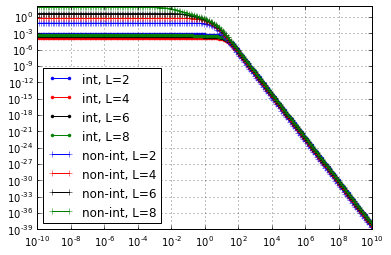

In [18]:
plt.loglog(mu_arr,norm_arr_intL2**2/2**2, 'b.-', label='int, L=2')
plt.loglog(mu_arr,norm_arr_intL4**2/2**4, 'r.-', label='int, L=4')
plt.loglog(mu_arr,norm_arr_intL6**2/2**6, 'k.-', label='int, L=6')
plt.loglog(mu_arr,norm_arr_intL8**2/2**8, 'g.-', label='int, L=8')
plt.loglog(mu_arr,norm_arr_nonintL2**2/2**2, 'b+-', label='non-int, L=2')
plt.loglog(mu_arr,norm_arr_nonintL4**2/2**4, 'r+-', label='non-int, L=4')
plt.loglog(mu_arr,norm_arr_nonintL6**2/2**6, 'k+-', label='non-int, L=6')
plt.loglog(mu_arr,norm_arr_nonintL8**2/2**8, 'g+-', label='non-int, L=8')
plt.legend(loc='best')
plt.grid()

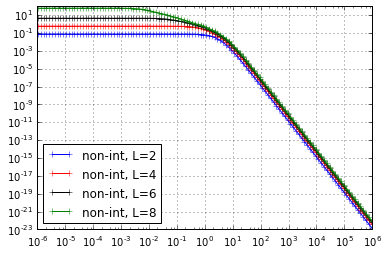

In [21]:
plt.loglog(mu_arr[40:160],norm_arr_nonintL2[40:160]**2/2**2, 'b+-', label='non-int, L=2')
plt.loglog(mu_arr[40:160],norm_arr_nonintL4[40:160]**2/2**4, 'r+-', label='non-int, L=4')
plt.loglog(mu_arr[40:160],norm_arr_nonintL6[40:160]**2/2**6, 'k+-', label='non-int, L=6')
plt.loglog(mu_arr[40:160],norm_arr_nonintL8[40:160]**2/2**8, 'g+-', label='non-int, L=8')
plt.legend(loc='best')
plt.grid()

In [21]:
x1,y1=np.loadtxt("v2.0_L6_nonint_mu_scaling.dat",unpack=True,skiprows=3 )
x2,y2=np.loadtxt("v2.0_L6_int_mu_scaling.dat",unpack=True,skiprows=3)

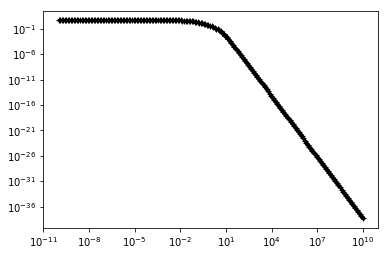

In [25]:
plt.loglog(mu_arr,norm_arr_nonintL6**2/2**6, 'k.-', label='non-int, L=6')
plt.loglog(x1,y1/2**6, 'k+-', label='non-int, L=6')

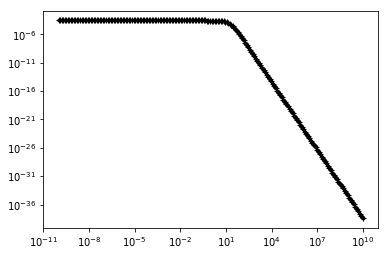

In [24]:
plt.loglog(mu_arr,norm_arr_intL6**2/2**6, 'k.-', label='non-int, L=6')
plt.loglog(x2,y2/2**6, 'k+-', label='non-int, L=6')

In [18]:
w1,z1=np.loadtxt("Test_L6_int_mu_scaling.dat",unpack=True,skiprows=3 )
w2,z2=np.loadtxt("Test_L6_nonint_mu_scaling.dat",unpack=True,skiprows=3)

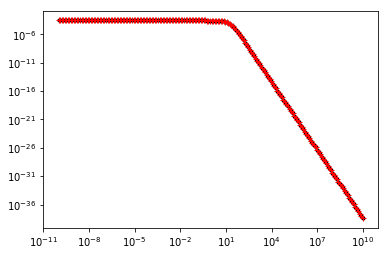

In [34]:
plt.loglog(mu_arr,norm_arr_intL6**2/2**6, 'k.-', label='non-int, L=6')
plt.loglog(x2,y2/2**6, 'r+-', label='non-int, L=6')

In [35]:
from scipy.optimize import curve_fit
def gfunc(x, a,c): #logfunction
    return a+ c*x
def org_func(x, a,c):
    return a*x**c
L=6
xdata =x2[180:]
ydata = y2[180:]/2**L
popt, pcov = curve_fit(gfunc, np.log(xdata), np.log(ydata))
print popt, np.diag(pcov)
a_in,b_in=popt
print " num,th:", np.exp(a_in), 4*2*(L-1) 

[ 3.68887945 -4.        ] [  2.88157393e-27   6.61576885e-30]
 num,th: 40.0 40


In [36]:
from scipy.optimize import curve_fit
def gfunc(x, a,c): #logfunction
    return a+ c*x
def org_func(x, a,c):
    return a*x**c
xdata =x1[180:]
ydata = y1[180:]/2**6
popt, pcov = curve_fit(gfunc, np.log(xdata), np.log(ydata))
print popt, np.diag(pcov)
a_in,b_in=popt
hz=(np.sqrt(5)+1)/4 
L=6
print " num,th:", np.exp(a_in), 4*(L*hz**2+2*(L-1))

[ 4.02012742 -4.        ] [  8.23306684e-28   1.89021966e-30]
 num,th: 55.7082039325 55.7082039325
